In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import seaborn as sns
plt.style.use('seaborn')

df = pd.read_csv('Laporan_Penjualan1.csv')

C:\Users\ACER\AppData\Local\Temp\ipykernel_1740\3605126105.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
df

,No,Customer ID,Customer Name,Product Code,Product Name,Quantity,Point Value,Price,Total PV,Total Price,SUM PV,SUM Price
0,1,2854492,Kurnia Putri,KDC1,Beauty Day Cream,1,20000,60000,20000,60000,86000,254000
1,2,2854492,Kurnia Putri,KNC1,Beauty Night Cream,2,25000,70000,50000,140000,86000,254000
2,3,2854492,Kurnia Putri,KSK1,Sabun Transparant Kolagen (WIL 1&2),1,6000,20000,6000,20000,86000,254000
3,4,2854492,Kurnia Putri,KSM1,Sabun Transparant Madu (WIL 1&2),1,5000,17000,5000,17000,86000,254000
4,5,2854492,Kurnia Putri,KSP1,SABUN TRANSPARANT PROPOLIS (WIL 1&2,1,5000,17000,5000,17000,86000,254000
...,...,...,...,...,...,...,...,...,...,...,...,...
400,401,4981459,Ari Wahyuni,PGH1,PASTA GIGI HERBAL SIWAK- SIRIH-MINT,1,3500,17000,3500,17000,27000,94000
401,402,4981459,Ari Wahyuni,OMB5,MINYAK HERBA SINERGI 2020,1,10000,30000,10000,30000,27000,94000
402,403,4981459,Ari Wahyuni,PGH1,PASTA GIGI HERBAL SIWAK- SIRIH-MINT,1,3500,17000,3500,17000,27000,94000
403,404,4985072,Tri Apri Aningsih,OMB5,MINYAK HERBA SINERGI 2020,1,10000,30000,10000,30000,20000,60000


In [3]:
print("Null value tiap kolom:")
print(df.isnull().sum())

Null value tiap kolom:
No               0
Customer ID      0
Customer Name    0
Product Code     0
Product Name     0
Quantity         0
Point Value      0
Price            0
Total PV         0
Total Price      0
SUM PV           0
SUM Price        0
dtype: int64


In [4]:
df = df.rename(columns={'Customer Name':'Customer_Name'})
df

,No,Customer ID,Customer_Name,Product Code,Product Name,Quantity,Point Value,Price,Total PV,Total Price,SUM PV,SUM Price
0,1,2854492,Kurnia Putri,KDC1,Beauty Day Cream,1,20000,60000,20000,60000,86000,254000
1,2,2854492,Kurnia Putri,KNC1,Beauty Night Cream,2,25000,70000,50000,140000,86000,254000
2,3,2854492,Kurnia Putri,KSK1,Sabun Transparant Kolagen (WIL 1&2),1,6000,20000,6000,20000,86000,254000
3,4,2854492,Kurnia Putri,KSM1,Sabun Transparant Madu (WIL 1&2),1,5000,17000,5000,17000,86000,254000
4,5,2854492,Kurnia Putri,KSP1,SABUN TRANSPARANT PROPOLIS (WIL 1&2,1,5000,17000,5000,17000,86000,254000
...,...,...,...,...,...,...,...,...,...,...,...,...
400,401,4981459,Ari Wahyuni,PGH1,PASTA GIGI HERBAL SIWAK- SIRIH-MINT,1,3500,17000,3500,17000,27000,94000
401,402,4981459,Ari Wahyuni,OMB5,MINYAK HERBA SINERGI 2020,1,10000,30000,10000,30000,27000,94000
402,403,4981459,Ari Wahyuni,PGH1,PASTA GIGI HERBAL SIWAK- SIRIH-MINT,1,3500,17000,3500,17000,27000,94000
403,404,4985072,Tri Apri Aningsih,OMB5,MINYAK HERBA SINERGI 2020,1,10000,30000,10000,30000,20000,60000


In [5]:
df['Customer_Name'].unique()

array(['Kurnia Putri', 'Gayatra Nandana Anindyajati', 'Tupo Pribadi',
       'Panimin', 'Barnianti', 'Yolanda Erma Yunita', 'Ita Arisani',
       'Tri Siwi Bekti Kusumastuti', 'Fariha Apriliya',
       'Fitri Suminar Megantara', 'Faizzah Salma', 'Ninis Fianti',
       'Mayang Tashani Sahira', 'Erlin Yuni Indriyati',
       'Sri Sinarwati,S.PD', 'Lilis Tri Ani', 'Listia Ayu Pertiwi',
       'Anita Amalia', 'Anggi', 'Ari Andriansyah', 'Sri Sulistiyani',
       'Erwien Sudarmono,S.PD,M.SI', 'Diah Fitri Arumingtias', 'PT HPAI',
       'Umi Faza Rokhmah', 'Woro Ribut Sugianti',
       'Apriliani Dyah Purbosiwi', 'Pipin Supinah',
       'Mohamad Arif Pramarta', 'Sri Larasati', 'Sukengsi',
       'Dwi Nofita Arisanti', 'Rahayu Murti', 'Widiyati', 'Ratminingsih',
       'Sri Astuti', 'Erna Yuni Indarwati', 'Bagus Rahma Aulia Chandra',
       'Lia Purwanti', 'Neneng Prasetyoningsih', 'Eka Rohmatin Khusniati',
       'Akhadiah Hanifah', 'Suhanggono', 'Nur Aini Zahiroh',
       'Annisa Juwita Nin

In [6]:
df['Customer_Name'].value_counts()

Sri Sinarwati,S.PD             72
Gayatra Nandana Anindyajati    63
Tupo Pribadi                   57
Erlin Yuni Indriyati           20
Sri Larasati                   14
Nur Aini Zahiroh               14
Erwien Sudarmono,S.PD,M.SI     14
Sri Sulistiyani                14
Rahayu Murti                   12
Neneng Prasetyoningsih         10
Annisa Juwita Ningrum          10
Widiyati                        8
Dwi Nofita Arisanti             7
Apriliani Dyah Purbosiwi        7
Woro Ribut Sugianti             7
Faizzah Salma                   5
Kurnia Putri                    5
Lia Purwanti                    4
Ari Wahyuni                     4
Sukengsi                        4
Tri Siwi Bekti Kusumastuti      4
Pipin Supinah                   4
Ita Arisani                     4
Erna Yuni Indarwati             3
Yolanda Erma Yunita             3
Diah Fitri Arumingtias          3
Barnianti                       3
Eka Rohmatin Khusniati          3
Sri Astuti                      2
Suhanggono    

In [7]:
len(df['Customer_Name'].value_counts())

47

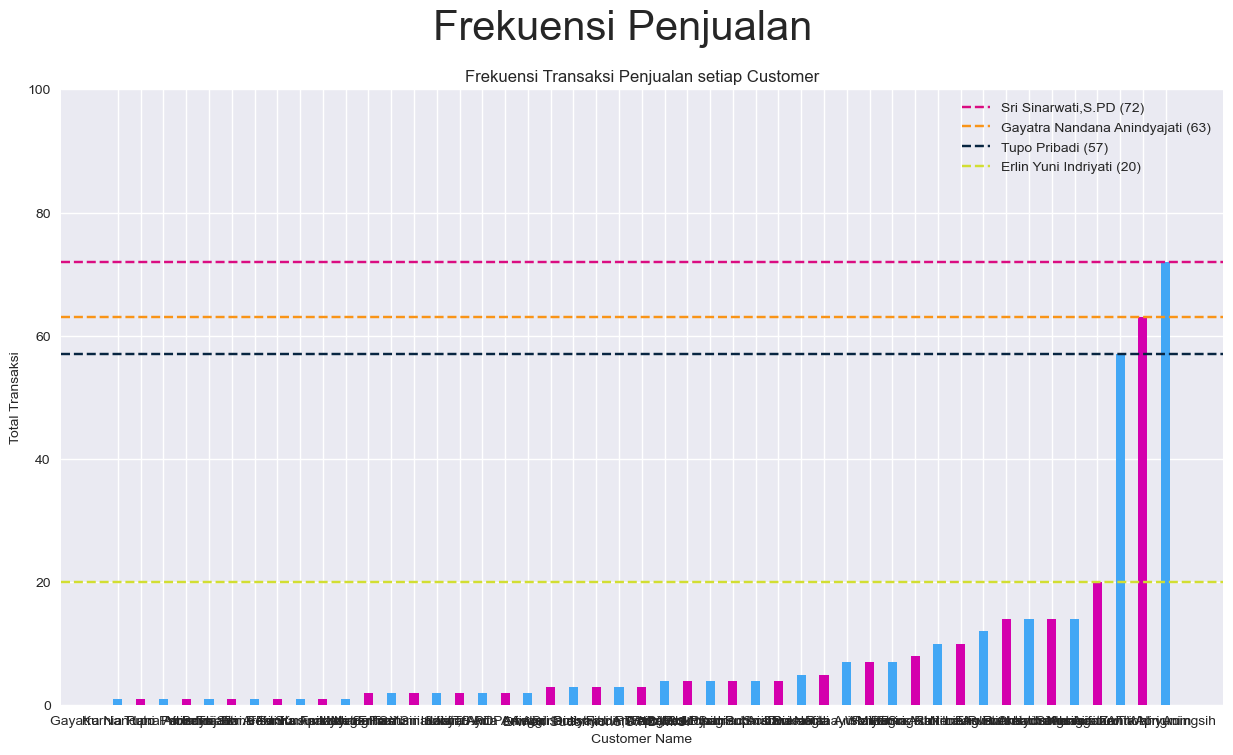

In [8]:
labels=df['Customer_Name'].unique()
values=df['Customer_Name'].value_counts(ascending=True)


fig, ax0 = plt.subplots(figsize=(15,8))
bar = ax0.bar(x=labels, height=values, width=0.4, align='center', color=['#42a7f5','#d400ad'])
ax0.set(title='Frekuensi Transaksi Penjualan setiap Customer',xlabel='Customer Name', ylabel='Total Transaksi')
ax0.set_ylim(0,100)
ax0.axhline(y=df['Customer_Name'].value_counts()[0], color='#DA0C81', linestyle='--', label=f'Sri Sinarwati,S.PD ({df.Customer_Name.value_counts()[0]})')
ax0.axhline(y=df['Customer_Name'].value_counts()[1], color='#F99417', linestyle='--', label=f'Gayatra Nandana Anindyajati ({df.Customer_Name.value_counts()[1]})')
ax0.axhline(y=df['Customer_Name'].value_counts()[2], color='#072541', linestyle='--', label=f'Tupo Pribadi ({df.Customer_Name.value_counts()[2]})')
ax0.axhline(y=df['Customer_Name'].value_counts()[3], color='#D2DE32', linestyle='--', label=f'Erlin Yuni Indriyati ({df.Customer_Name.value_counts()[3]})')
ax0.legend()


fig.suptitle('Frekuensi Penjualan', fontsize=30);
plt.show()

In [9]:
df1 = df.drop(['Customer ID','Quantity','No','Product Name','Point Value','Price','Product Code','Total Price','Total PV'], axis=1)

In [10]:
df1=df1.groupby(['Customer_Name']).mean()
df1.head(10)

,SUM PV,SUM Price
Customer_Name,,
Akhadiah Hanifah,7000.0,30000.0
Anggi,30000.0,100000.0
Anita Amalia,8000.0,30000.0
Annisa Juwita Ningrum,92000.0,314000.0
Apriliani Dyah Purbosiwi,190000.0,645000.0
Ari Andriansyah,0.0,30000.0
Ari Wahyuni,27000.0,94000.0
Bagus Rahma Aulia Chandra,30000.0,105000.0
Barnianti,31000.0,114000.0


In [11]:
df1 = df1.reset_index()
df1

,Customer_Name,SUM PV,SUM Price
0,Akhadiah Hanifah,7000.0,30000.0
1,Anggi,30000.0,100000.0
2,Anita Amalia,8000.0,30000.0
3,Annisa Juwita Ningrum,92000.0,314000.0
4,Apriliani Dyah Purbosiwi,190000.0,645000.0
5,Ari Andriansyah,0.0,30000.0
6,Ari Wahyuni,27000.0,94000.0
7,Bagus Rahma Aulia Chandra,30000.0,105000.0
8,Barnianti,31000.0,114000.0
9,Diah Fitri Arumingtias,35000.0,144000.0


In [12]:
df1 = df1.drop(['Customer_Name'], axis=1)
df1

,SUM PV,SUM Price
0,7000.0,30000.0
1,30000.0,100000.0
2,8000.0,30000.0
3,92000.0,314000.0
4,190000.0,645000.0
5,0.0,30000.0
6,27000.0,94000.0
7,30000.0,105000.0
8,31000.0,114000.0
9,35000.0,144000.0


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SUM PV     47 non-null     float64
 1   SUM Price  47 non-null     float64
dtypes: float64(2)
memory usage: 880.0 bytes


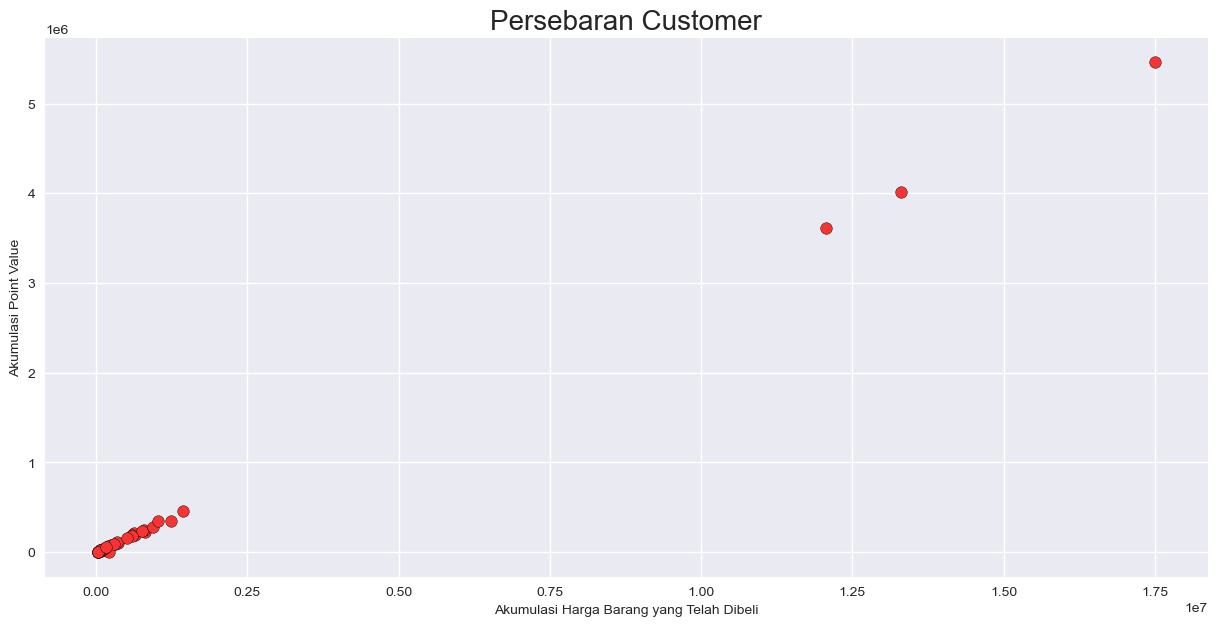

In [14]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=df1['SUM PV'],x=df1['SUM Price'], s=70, color='#f73434', edgecolor='black', linewidth=0.3)
ax.set_ylabel('Akumulasi Point Value')
ax.set_xlabel('Akumulasi Harga Barang yang Telah Dibeli')
plt.title('Persebaran Customer', fontsize = 20)
plt.show()

In [15]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,9):
    km = KMeans(i)
    km.fit(df1)
    wcss.append(km.inertia_)
np.array(wcss)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

array([6.23261083e+14, 2.40847078e+13, 6.83546956e+12, 2.12072426e+12,
       1.28490264e+12, 5.66068430e+11, 3.37048500e+11, 1.80925923e+11])

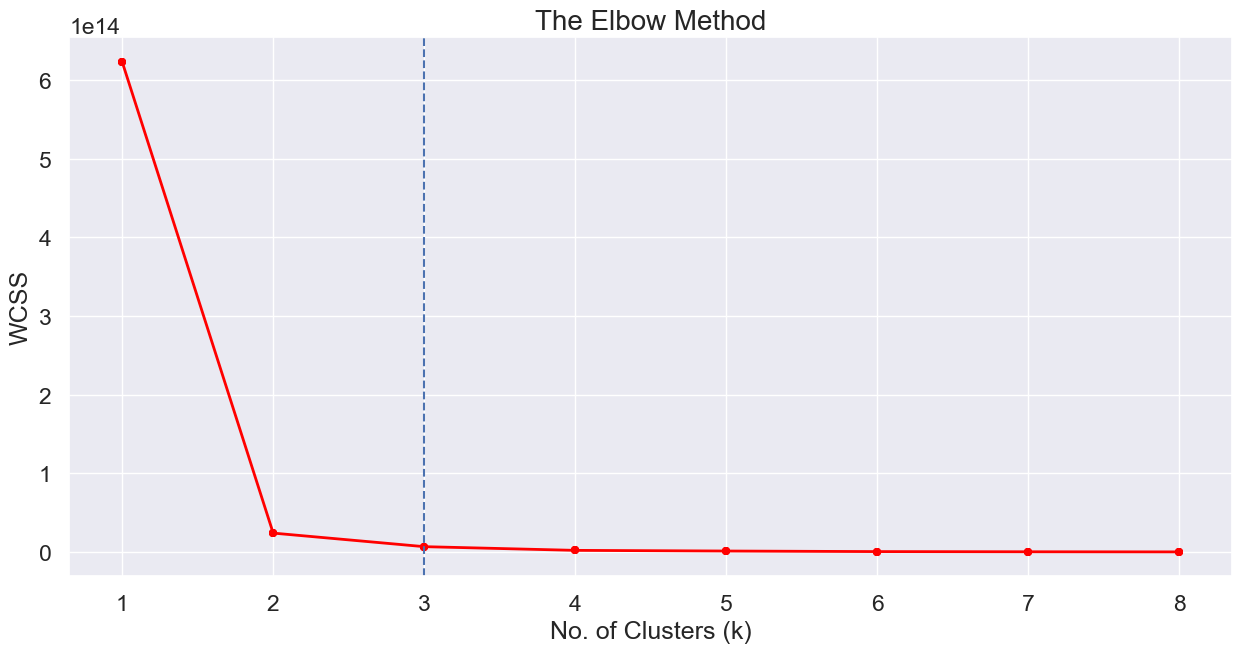

In [16]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,9),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

In [42]:
kms = KMeans(n_clusters=3, init='k-means++')
kms.fit(df1)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [36]:
df1.iloc[0]

SUM PV        7000.0
SUM Price    30000.0
Name: 0, dtype: float64

In [46]:
kms.predict([[7000, 30000]])[0]

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


0

In [18]:
clusters = df1.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(df1)
print(clusters)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


       SUM PV   SUM Price  Cluster_Prediction
0      7000.0     30000.0                   0
1     30000.0    100000.0                   0
2      8000.0     30000.0                   0
3     92000.0    314000.0                   0
4    190000.0    645000.0                   0
5         0.0     30000.0                   0
6     27000.0     94000.0                   0
7     30000.0    105000.0                   0
8     31000.0    114000.0                   0
9     35000.0    144000.0                   0
10   212000.0    630000.0                   0
11    21500.0     77000.0                   0
12   353000.0   1241000.0                   0
13    15000.0     64000.0                   0
14   223000.0    806000.0                   0
15   102000.0    358000.0                   0
16    40000.0    135000.0                   0
17     7000.0     34000.0                   0
18  4010500.0  13301000.0                   1
19   112000.0    340000.0                   0
20    86000.0    254000.0         

In [19]:
kms.cluster_centers_

array([[   96568.18181818,   320090.90909091],
       [ 3809750.        , 12686500.        ],
       [ 5460000.        , 17498000.        ]])

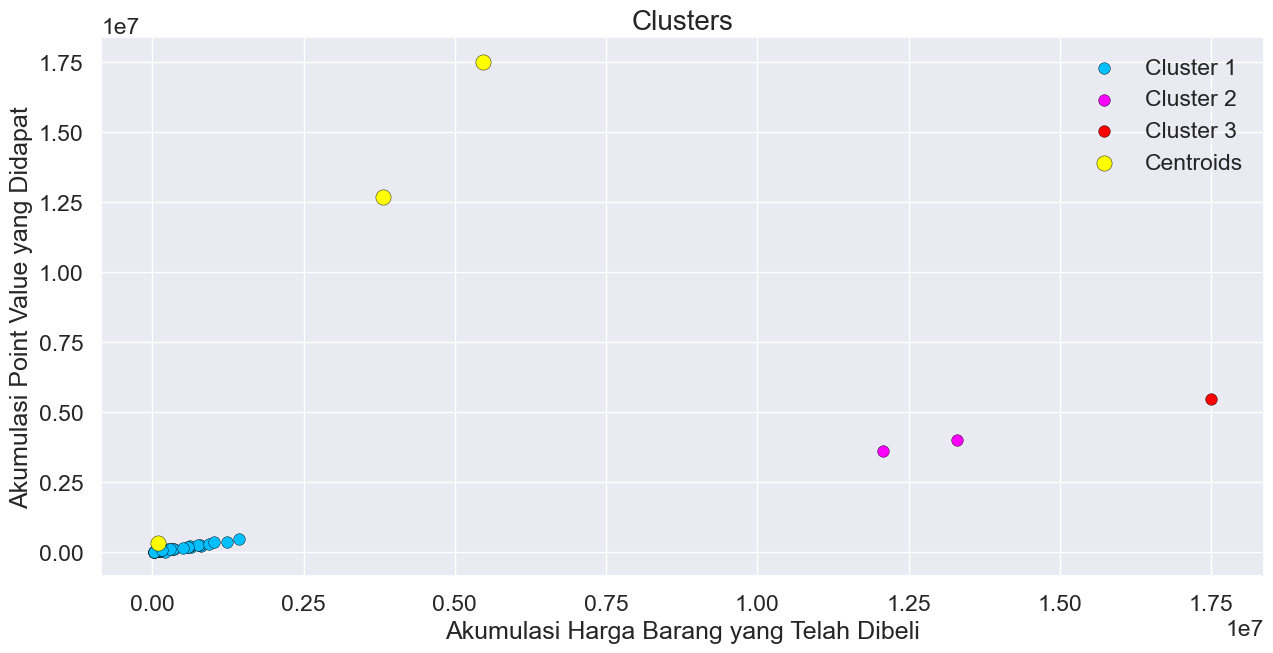

In [20]:
fig, ax = plt.subplots(figsize=(15,7)) 


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['SUM Price'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['SUM PV'],
            s=70,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 1')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['SUM Price'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['SUM PV'],
            s=70,edgecolor='black', linewidth=0.3, c='magenta', label='Cluster 2')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['SUM Price'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['SUM PV'],
            s=70,edgecolor='black', linewidth=0.3, c='red', label='Cluster 3')



plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')

plt.xlabel('Akumulasi Harga Barang yang Telah Dibeli')
plt.ylabel('Akumulasi Point Value yang Didapat')
plt.title('Clusters', fontsize = 20)
plt.show()

In [21]:
df2 = df1.loc[df1['SUM Price'] < 5000000]
df2

,SUM PV,SUM Price
0,7000.0,30000.0
1,30000.0,100000.0
2,8000.0,30000.0
3,92000.0,314000.0
4,190000.0,645000.0
5,0.0,30000.0
6,27000.0,94000.0
7,30000.0,105000.0
8,31000.0,114000.0
9,35000.0,144000.0


In [22]:
df2.isna().sum()

SUM PV       0
SUM Price    0
dtype: int64

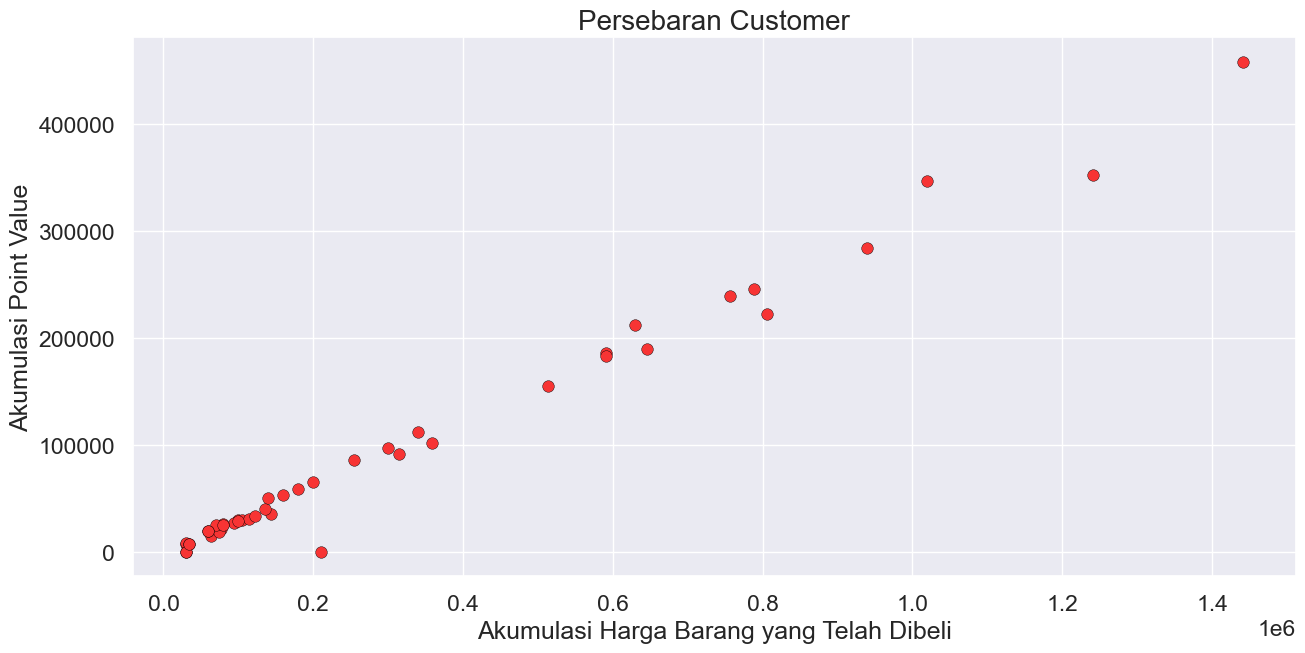

In [23]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=df2['SUM PV'],x=df2['SUM Price'], s=70, color='#f73434', edgecolor='black', linewidth=0.3)
ax.set_ylabel('Akumulasi Point Value')
ax.set_xlabel('Akumulasi Harga Barang yang Telah Dibeli')
plt.title('Persebaran Customer', fontsize = 20)
plt.show()

In [24]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,9):
    km = KMeans(i)
    km.fit(df2)
    wcss.append(km.inertia_)
np.array(wcss)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

array([5.99964793e+12, 1.28490264e+12, 5.66068430e+11, 3.37075142e+11,
       1.80925923e+11, 1.27163990e+11, 7.75182250e+10, 5.19531000e+10])

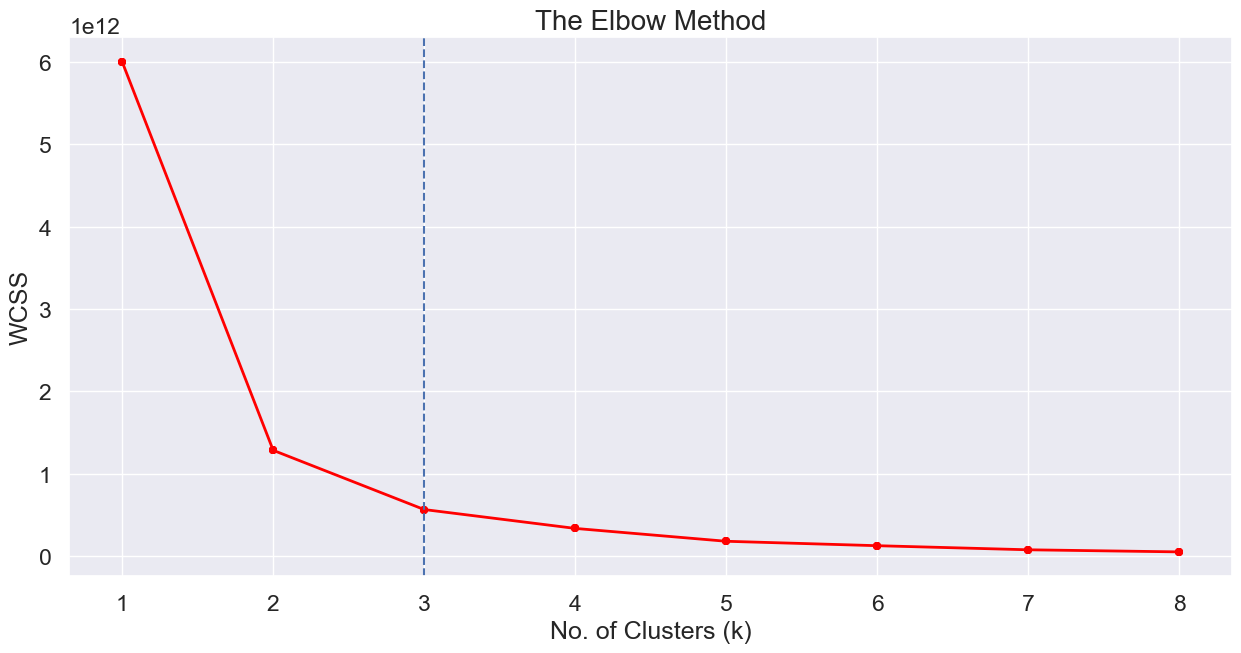

In [25]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,9),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

In [26]:
kms = KMeans(n_clusters=3, init='k-means++')
kms.fit(df2)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [27]:
clusters = df2.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(df2)
print(clusters)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


      SUM PV  SUM Price  Cluster_Prediction
0     7000.0    30000.0                   0
1    30000.0   100000.0                   0
2     8000.0    30000.0                   0
3    92000.0   314000.0                   0
4   190000.0   645000.0                   1
5        0.0    30000.0                   0
6    27000.0    94000.0                   0
7    30000.0   105000.0                   0
8    31000.0   114000.0                   0
9    35000.0   144000.0                   0
10  212000.0   630000.0                   1
11   21500.0    77000.0                   0
12  353000.0  1241000.0                   2
13   15000.0    64000.0                   0
14  223000.0   806000.0                   1
15  102000.0   358000.0                   0
16   40000.0   135000.0                   0
17    7000.0    34000.0                   0
19  112000.0   340000.0                   0
20   86000.0   254000.0                   0
21   59000.0   180000.0                   0
22   19000.0    74000.0         

In [28]:
kms.cluster_centers_

array([[  36609.375     ,  128812.5       ],
       [ 213222.22222222,  695555.55555556],
       [ 386166.66666667, 1234000.        ]])

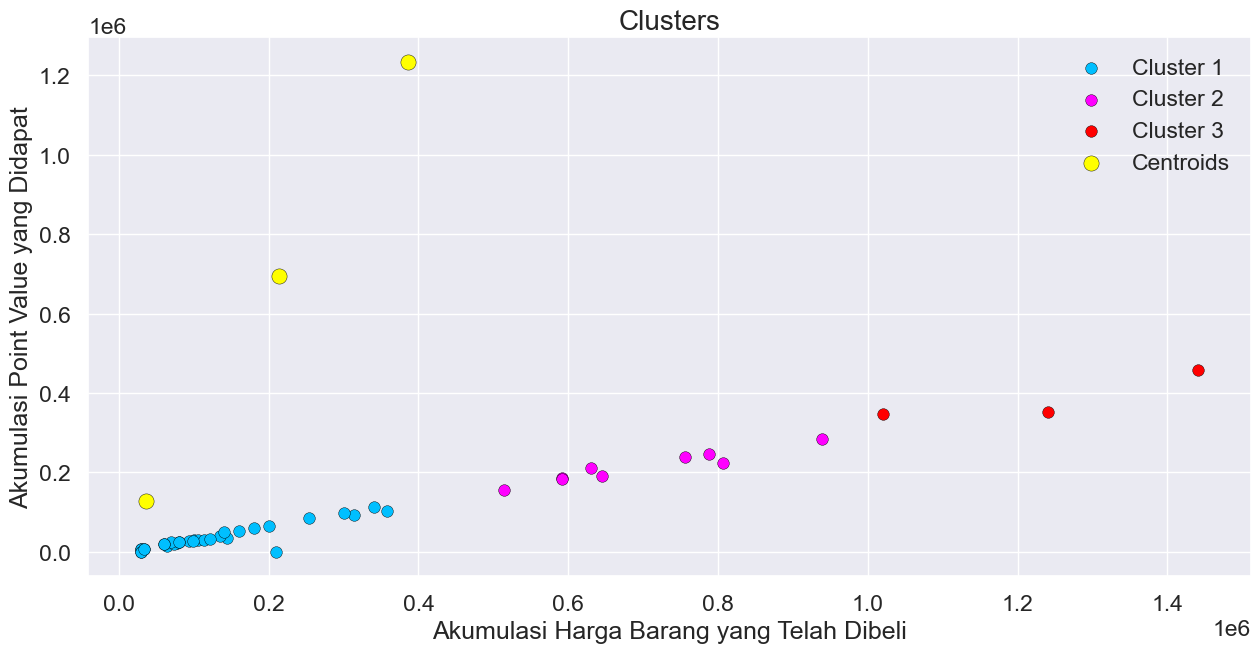

In [29]:
fig, ax = plt.subplots(figsize=(15,7)) 


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['SUM Price'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['SUM PV'],
            s=70,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 1')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['SUM Price'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['SUM PV'],
            s=70,edgecolor='black', linewidth=0.3, c='magenta', label='Cluster 2')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['SUM Price'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['SUM PV'],
            s=70,edgecolor='black', linewidth=0.3, c='red', label='Cluster 3')



plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')

plt.xlabel('Akumulasi Harga Barang yang Telah Dibeli')
plt.ylabel('Akumulasi Point Value yang Didapat')
plt.title('Clusters', fontsize = 20)
plt.show()

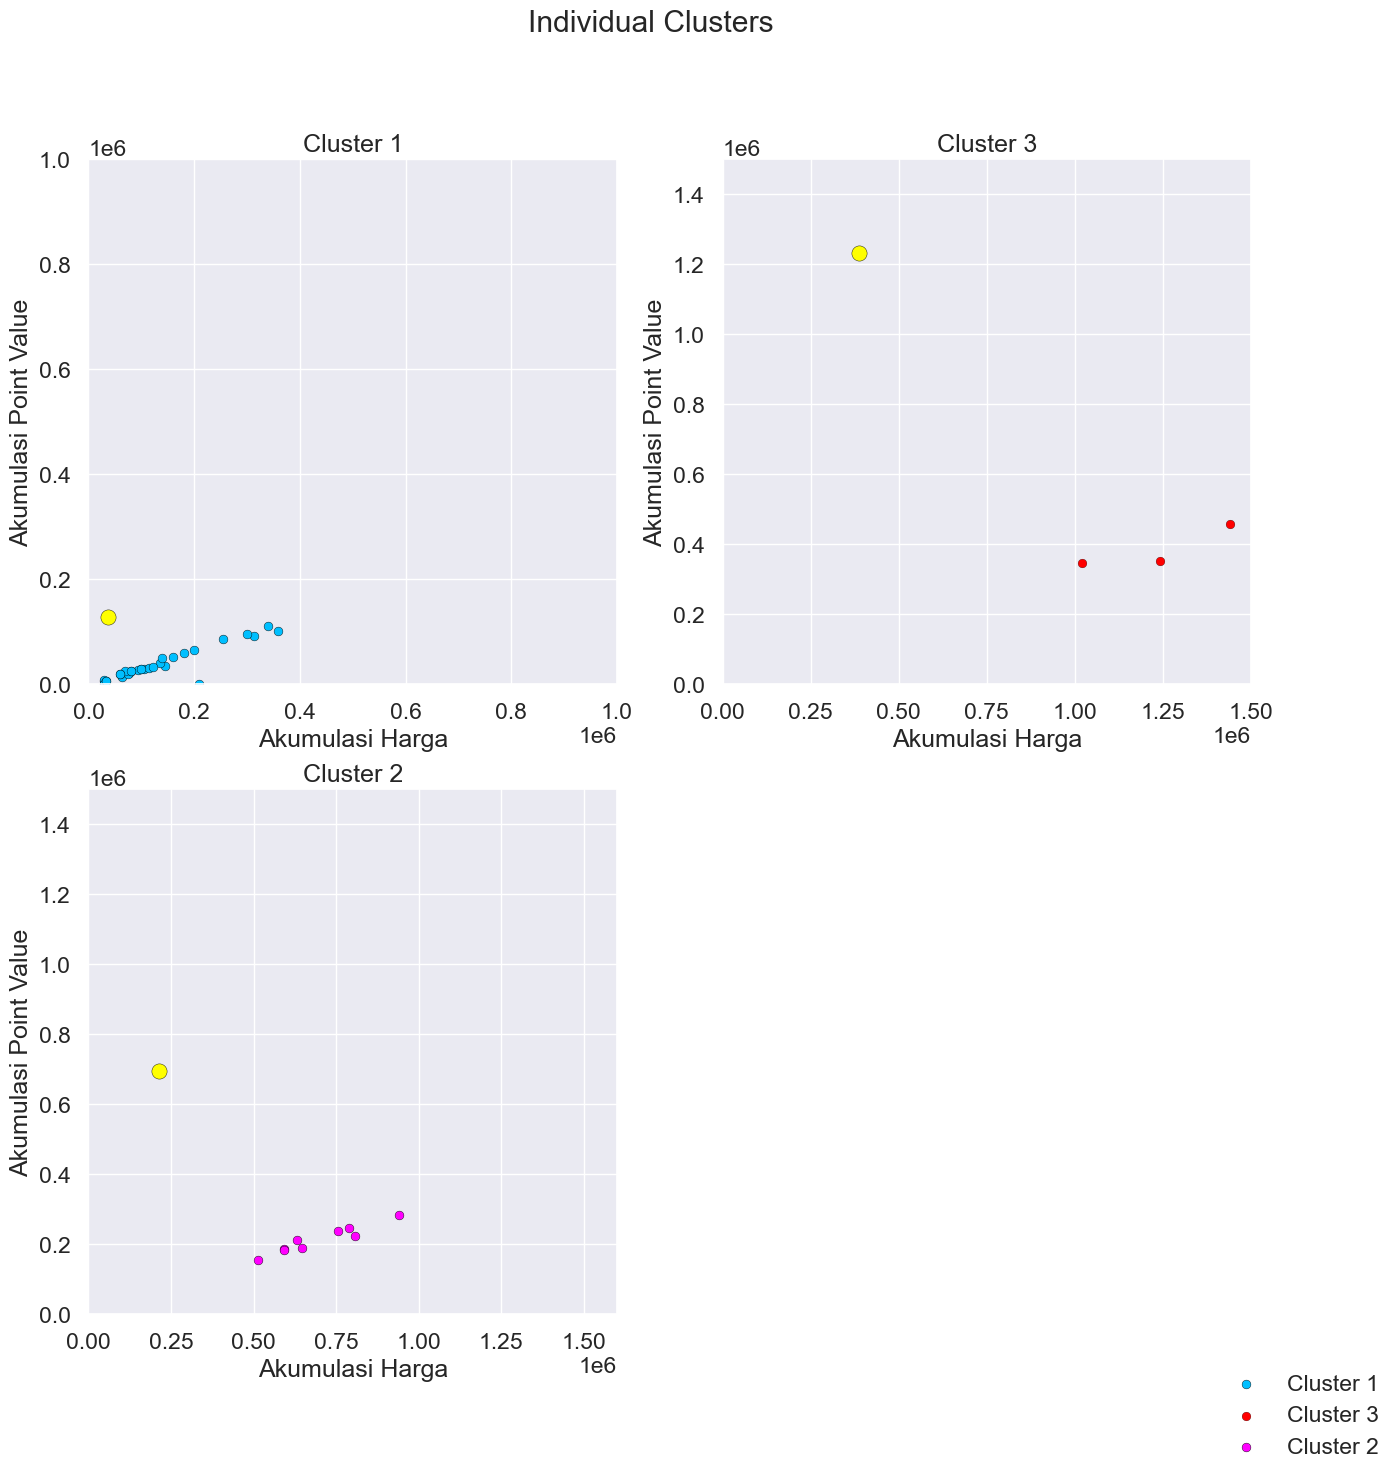

In [30]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

ax[0,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['SUM Price'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['SUM PV'],
            s=40,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 1')
ax[0,0].scatter(x=kms.cluster_centers_[0,0], y=kms.cluster_centers_[0,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[0,0].set(xlim=(0,1000000), ylim=(0,1000000), xlabel='Akumulasi Harga', ylabel='Akumulasi Point Value', title='Cluster 1')

ax[0,1].scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['SUM Price'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['SUM PV'],
            s=40,edgecolor='black', linewidth=0.2, c='red', label='Cluster 3')
ax[0,1].scatter(x=kms.cluster_centers_[2,0], y=kms.cluster_centers_[2,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[0,1].set(xlim=(0,1500000), ylim=(0,1500000), xlabel='Akumulasi Harga', ylabel='Akumulasi Point Value', title='Cluster 3')

ax[1,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['SUM Price'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['SUM PV'],
            s=40,edgecolor='black', linewidth=0.3, c='magenta', label='Cluster 2')
ax[1,0].scatter(x=kms.cluster_centers_[1,0], y=kms.cluster_centers_[1,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[1,0].set(xlim=(0,1600000), ylim=(0,1500000), xlabel='Akumulasi Harga', ylabel='Akumulasi Point Value', title='Cluster 2')

fig.delaxes(ax[1,1])
fig.legend(loc='lower right')
fig.suptitle('Individual Clusters')
plt.show()